In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
demograpgics = pd.read_csv('datasets/exam-1/demographics.csv')
cc = pd.read_csv('datasets/exam-1/cc.csv')
cc.sort_values(by=['cc_no', 'pos_dt'], inplace=True)
kplus = pd.read_csv('datasets/exam-1/kplus.csv')
kplus.sort_values(by=['id', 'sunday'], inplace=True)
train_set = pd.read_csv('datasets/exam-1/train.csv')
test_set = pd.read_csv('datasets/exam-1/test.csv')

In [3]:
demograpgics.head()

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3


In [4]:
cc.head(20)

,cc_no,pos_dt,cc_txn_amt
30680,2,2018-03-10,800
30684,2,2018-03-12,3800
30685,2,2018-04-27,14700
30687,2,2018-04-29,4000
30682,2,2018-05-07,800
30681,2,2018-05-14,800
30686,2,2018-06-04,1000
30683,2,2018-06-11,1000
947320,4,2018-05-11,20000
947338,4,2018-05-11,30000


In [5]:
kplus.head(20)

,id,sunday,kp_txn_count,kp_txn_amt
822506,1,2018-06-03,1,1500
822505,1,2018-06-17,1,2000
100625,2,2018-01-07,2,600
100629,2,2018-01-14,3,3200
100641,2,2018-01-21,2,600
100644,2,2018-01-28,6,3000
100643,2,2018-02-04,4,13700
100627,2,2018-02-11,5,3500
100631,2,2018-02-18,5,2100
100633,2,2018-02-25,1,300


In [6]:
train_set.head()

,id,income
0,1,20000
1,2,106000
2,3,29000
3,4,61000
4,5,18000


In [7]:
test_set.head()

,id
0,50001
1,50002
2,50003
3,50004
4,50005


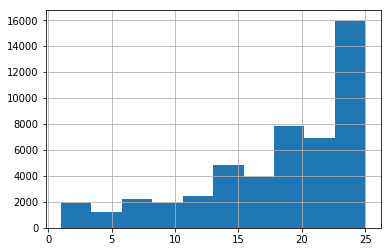

In [8]:
kplus.groupby(['id']).count()['sunday'].hist()

In [9]:
from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


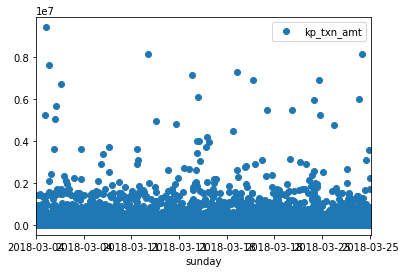

In [10]:
kplus_in_march = kplus[(kplus['sunday'] > '2018-03-01') & (kplus['sunday'] < '2018-03-31')]
kplus_in_march.sort_values(['sunday'], inplace=True)

kplus_in_march.plot(x='sunday', y='kp_txn_amt', style='o')

In [11]:
kplus_in_march.describe()

,id,kp_txn_count,kp_txn_amt
count,140427.000000,140427.000000,1.404270e+05
mean,32204.311635,4.341081,2.876084e+04
std,18721.126620,5.836493,1.276750e+05
min,2.000000,1.000000,1.000000e+02
25%,15956.000000,2.000000,1.700000e+03
50%,32091.000000,3.000000,6.700000e+03
75%,48367.000000,5.000000,2.150000e+04
max,64999.000000,321.000000,9.428100e+06


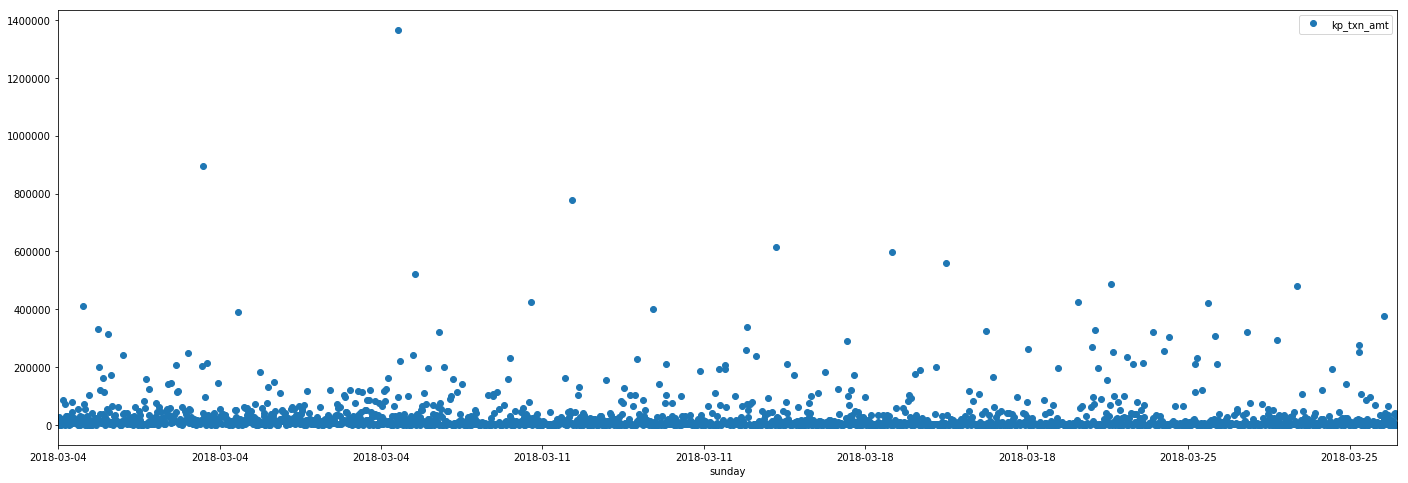

In [12]:
trend = kplus_in_march[kplus_in_march['id'] < 1000]
trend.plot(x='sunday', y='kp_txn_amt', style='o', figsize=(24,8))

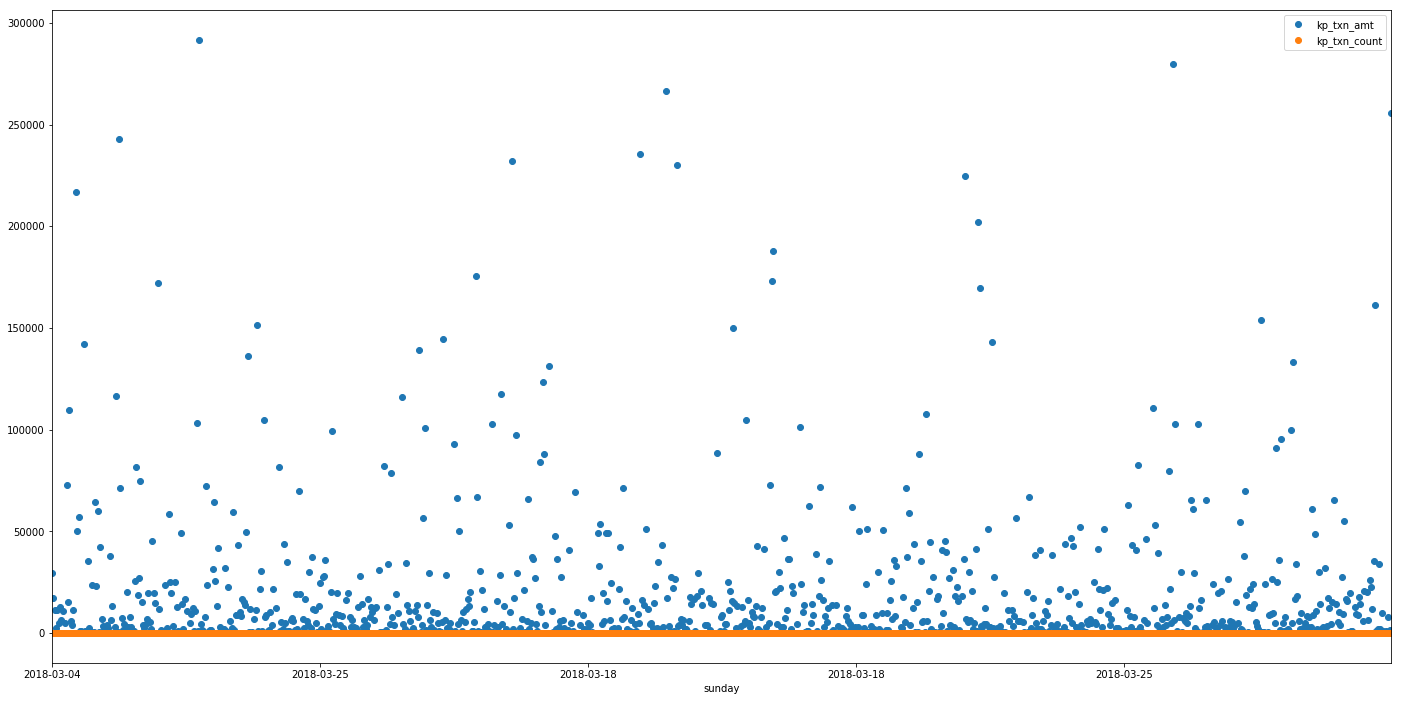

In [13]:
trend = kplus_in_march[(np.abs(stats.zscore(kplus_in_march['kp_txn_amt']) < 2.5))]

trend = trend.sample(1000)

trend.plot(x='sunday', y=['kp_txn_amt', 'kp_txn_count'], style='o', figsize=(24,12))

## Money spent on kplus trend each month

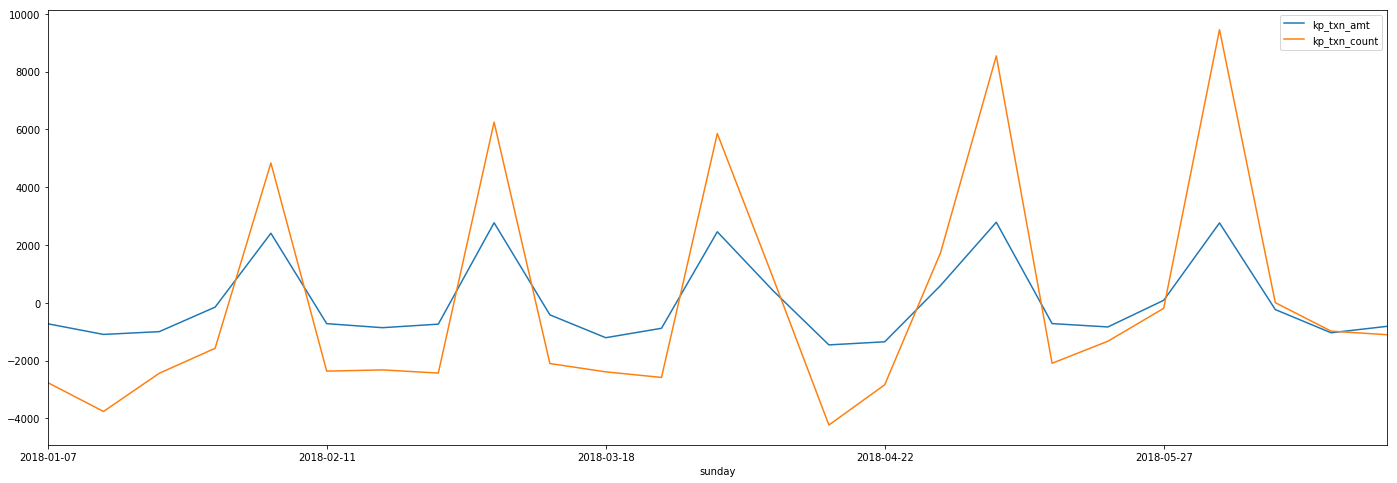

In [26]:
trend = kplus.copy()
stardardizes = ['kp_txn_amt', 'kp_txn_count']
for col in stardardizes:
    trend[col] = (trend[col] - trend[col].mean()) / trend[col].std()

trend.groupby('sunday').sum().sort_values(by=['sunday']).plot(y=['kp_txn_amt', 'kp_txn_count'], figsize=(24,8))


## Credit trend

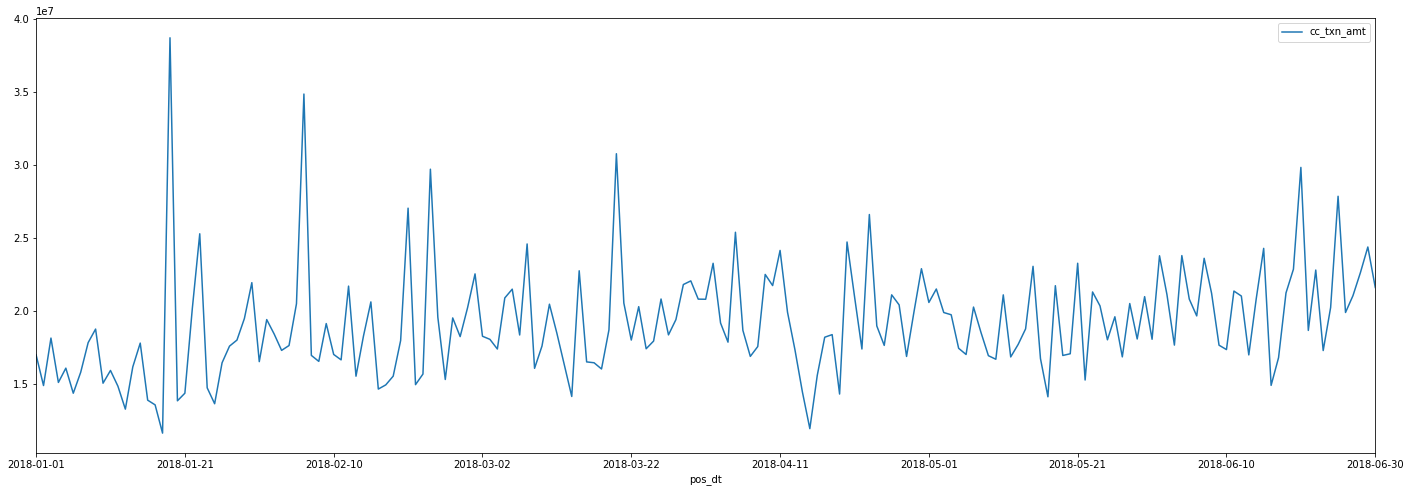

In [40]:
trend = cc.copy()
# stardardizes = ['cc_txn_amt']
# for col in stardardizes:
#     trend[col] = (trend[col] - trend[col].mean()) / trend[col].std()

trend.groupby('pos_dt').sum().sort_values(by=['pos_dt']).plot(y=['cc_txn_amt'], figsize=(24,8),)
